

# BCIS 5110 Structure Of Programming Languages

# Final Project : Bank Customer Classification                                                                          
                                      

__Table of  Contents__
* Executive summary
* Project motivation/background
* Data description
* Data Preprocessing
    * __Exploratory data Analysis__
          * Outlier Analysis
          * Finding Missing values in data
          * Visualization: Graphs & Plots 
    * Binarization of categorical variables: One Hot Encoding
    * Perform 80/20 split  
* Create Models
    * Logistic Regression Model
    * Grid Search for logistics regression
    * Feature extraction  
    * SVM Model 
    * Decision Tree
* Conclusion

# Project motivation/background

There are two main approaches for enterprises to promote products and/or services: through mass campaigns, targeting general indiscriminate public or directed marketing, targeting a specific set of contacts. Nowadays, in a global competitive world, positive responses to mass campaigns are typically very low. Alternatively, directed marketing focus on target markets assumed to be keener to that specific product/service, making this kind of campaigns more attractive due to its efficiency. Nevertheless, directed marketing has some drawbacks, for instance, it may trigger a negative attitude towards banks due to the intrusion of privacy.

It should be stressed that, due to internal competition and current financial crisis, there are huge pressures for European banks to increase a financial asset. To solve this issue, one adopted strategy is offer attractive long-term deposit applications with good interest rates, in particular by using directed marketing campaigns. Furthermore, the same drivers are pressing for a reduction in costs and time. Thus, there is a need for an improvement in efficiency: lesser contacts should be done, but an approximately number of successes (clients subscribing the deposit) should be kept.

With the current increase and changes in technology, a large amount of marketing campaigns for banks are based on electronic data from customers. We know that it is not easy to obtain analytical predictions of such large-scale data sources that would assist in the decision-making process without using a high level, general purpose programming language. Therefore, to make our job easy and effective we used Python models to analyze these campaign results. The objective is to analyze data using Simple Logistic Regression Model, Decision Trees, Simple SVM Model techniques on a real-world data set of bank deposit subscription. Our main motive is to help banking industry and increasing the campaign effectiveness by identifying the main characteristics that affect a success (the deposit subscribed by the client).

In our project we predicted the success of telemarketing calls for selling bank long-term deposits. The data is linked to a Portuguese banking institution’s direct marketing strategy (data collected between 2008 and 2013). The campaigns for marketing were based on phone calls. In order to access if the item (bank term deposit) would be (' yes') or not (' no') subscribed.


# # Data description


Source: UCI Machine learning (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
Domain: Bank direct marketing
No. Of variables: 17
No. of records: 45211
Classification problem: The goal is to predict if the client will subscribe a term deposit (variable y).



1)__age__: Age of customers                                        (numeric)                        
2)__job__: type of job                                             (categorical)                
3)__marital__ : marital status                                     (categorical)                     
4)__education__: education level of customers                      (categorical)                   
5)__default__: has credit in default?                              (categorical)                  
6)__balance__: Avg Annual account balance                            (Numeric)                   
7)__housing__: has housing loan?                                   (categorical)                  
8)__loan__: has personal loan?                                     (categorical)                  

# Related with the last contact of the current campaign:

9)__contact__: contact communication type                          (categorical)                         
10)__day__: last contact day of the week                           (categorical)                         
11)__month__: last contact month of year                           (categorical)                           
12)__duration__: last contact duration, in seconds                 (numeric)                              

# Other attributes:
13) __campaign__: number of contacts performed during this campaign and for this client (__numeric__)             
14) __pdays__: number of days that passed by after the client was last contacted from a previous campaign  
                  (__numeric__; 999 = client was not previously contacted)                                    
15) __previous__: number of contacts performed before this campaign and for this client (__numeric__)                  
16) __poutcome__: outcome of the previous marketing campaign (__categorical__)                                     

# Target Variable

17)__Y__: Subscribed: If customer accepted the offer. Yes/No

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import graphviz
from sklearn import metrics as mt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.linear_model import LogisticRegression
from sklearn.externals.six import StringIO   
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
%matplotlib inline

In [3]:
# Import the file into pandas dataFrame
bankPromo = pd.read_csv("bank-full.csv", sep = ",")

# "y" (Target variable) renamed to "Subscribed"
bankPromo = bankPromo.rename(columns={"y":"Subscribed"})

bankPromo.head(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


In [4]:
bankPromo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
housing       45211 non-null object
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
Subscribed    45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#get the variable statistics
bankPromo.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# Check for any duplicate values in dataset
bankPromo.duplicated().any()

False

# Outlier Analysis

First, We will perform outlier analysis, here we will look for any abnormal data values (__Observations that are + or -3 std. deviation away from mean__). Having outliers in data may affect our model performance and results.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c5a4588>]],
      dtype=object)

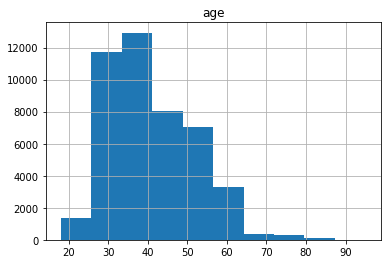

In [7]:
bankPromo.hist(column='age')

In [8]:
#Check number of observations that are (+-)3 std deviations away from mean of Age variable
bankPromo[bankPromo['age'] > 70].shape[0]

487

There are about 487 observations in "Age" feature that are more than three standard deviations away from the mean, a close examination of these value doesn't reveal any data entry issues. Neither these values are unrealistic. Moreover, our dataset has more than 45K instances and presence of these moderate outliers(487 in number) wouldn't obscure the trend in our dataset because of size of dataset. Since there is no strong reason to remove these values, we would retain all values for "Age" feature in the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f8a9ac8>]],
      dtype=object)

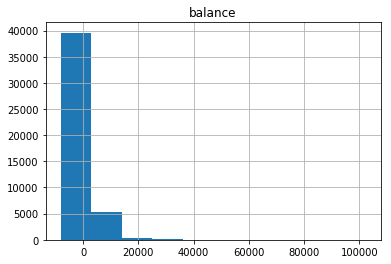

In [9]:
bankPromo.hist(column='balance')

In [10]:
bankPromo[bankPromo['balance'] > 10000].shape[0]

829

Like many real world distributions as Income, Expenditures etc, distribution of "balance" feature is right skewed, long tailed one with about 829 obervations falling about three standard deviations away from the mean. Now since this data is coming from bank where balances are checked throughly and carefully and are controlled via multiple inspections, it is very unlikely that these outlier obervations are actual errors. Also, investigation of these outlier obervations doesnot reveal anythis amiss. Since there is no strong reason to remove these values, we would retain all values for "Balance" feature in the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a213a60f0>]],
      dtype=object)

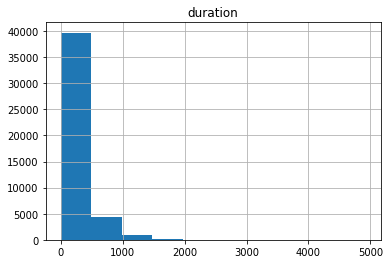

In [11]:
bankPromo.hist(column='duration')

In [12]:
bankPromo[bankPromo['duration'] > 1000].shape[0]

1058

Again, like many real world distributions, distribution of "duration" feature is right skewed, long tailed one with about about 1058 obervations falling about three standard deviations away from the mean. But again, as call duration depends upon amount of information needed by the customer or hold times on part of employees, classifying some of these instances as data entry error is not suited. Close investigation of these instances doesnot reveal any potential issues. Also, since most of the data in this approx 45K obswrvation dataset lie within three standard deviations from mean duration, we donot see a reason to drop these observations from our dataset.Since there is no strong reason to remove these values, we would retain all values for "Duration" feature in the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a213b7438>]],
      dtype=object)

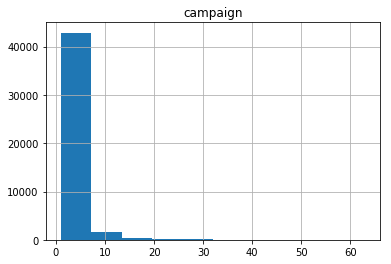

In [13]:
bankPromo.hist(column='campaign')

In [14]:
print(bankPromo[bankPromo['campaign'] > 10].shape[0])

1196


Distribution of "campaign" feature is right skewed, long tailed one with about about 1196 obervations falling about three standard deviations away from the mean. A close investigation reveals that most of the people who were contacted multiple times, have median call durations less than 1 min and 20 sec. It could very well be likely that these people were contacted at their busy hour times. So for now, we would retain all values for "campaign" feature in the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f746668>]],
      dtype=object)

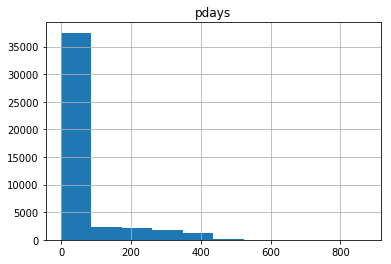

In [15]:
bankPromo.hist(column='pdays')

In [16]:
bankPromo[bankPromo['pdays'] > 400].shape[0]

234

"Pdays" is right skewed, long tailed with about 234 observations falling more than three standard deviations away from mean. More than 80% of people contacted were new. That is why we see this skewness. Normally any data that is three standard deviations away fro mean is considered unusual, but a close analysis of this subset does not show any kind of data issues. When viewing other feature values for them, they are spread across and do not reveal any kind of pattern. If we consider the the remaining close to 18% of old customers contacted again for this campaign, this forms close to 3% of that dataset and 0.005% of the overall dataset. Since we do not have more information about number of campaigns per year and length of campaigns, we will assume these have been intentionally added to this campaign. So we do not see any reason of excluding these rows.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f79a668>]],
      dtype=object)

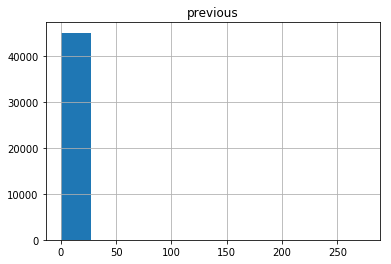

In [17]:
bankPromo.hist(column='previous')

In [18]:
bankPromo[bankPromo['previous'] > 8].shape[0]

453

This is from the same dataset of old customers which forms less than 20% of the overall dataset."previous" is right skewed, long tailed with about 453 observations falling more than three standard deviations away. Because for almost 80% of the data, this value is 0, meaning not contacted before. Hence the skewness. Careful examination of this subset does not show any patterns of data issues. This forms close to 5% of the old customers subset in this dataset and there can be valid reasons for calling customers so many times. Based on the data description, this number is the number of contacts performed before this campaign and does not tell it spreads across how many campaigns. We do not see strong reasons here to exclude these observations.


In [19]:
# find all unique values for categorical variables and create list
categoryVars = list()

# List for numerical variables
numericVars = list()

for colName in bankPromo.columns:
    if bankPromo[colName].dtype == np.int64:
        numericVars.append(colName)
    elif bankPromo[colName].dtype == np.object:
        categoryVars.append(colName)
    else:
        pass
    
print(numericVars)
print(categoryVars)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Subscribed']


In [20]:
#Find & Print Unique values for each categorical variable
for categoricalColumn in categoryVars:
    print("\n The Unique values for \033[1m %s \033[0m variable are: \n" %categoricalColumn.upper())
    print(pd.Series(bankPromo[categoricalColumn].unique()))


 The Unique values for  JOB  variable are: 

0        management
1        technician
2      entrepreneur
3       blue-collar
4           unknown
5           retired
6            admin.
7          services
8     self-employed
9        unemployed
10        housemaid
11          student
dtype: object

 The Unique values for  MARITAL  variable are: 

0     married
1      single
2    divorced
dtype: object

 The Unique values for  EDUCATION  variable are: 

0     tertiary
1    secondary
2      unknown
3      primary
dtype: object

 The Unique values for  DEFAULT  variable are: 

0     no
1    yes
dtype: object

 The Unique values for  HOUSING  variable are: 

0    yes
1     no
dtype: object

 The Unique values for  LOAN  variable are: 

0     no
1    yes
dtype: object

 The Unique values for  CONTACT  variable are: 

0      unknown
1     cellular
2    telephone
dtype: object

 The Unique values for  MONTH  variable are: 

0     may
1     jun
2     jul
3     aug
4     oct
5     nov
6     de

In [21]:
categoryVars = list()

# List to hold names of numerical variables
numericVars = list()

for colName in bankPromo.columns:
    if bankPromo[colName].dtype == np.int64:
        numericVars.append(colName)
    elif bankPromo[colName].dtype == np.object:
        categoryVars.append(colName)
    else:
        pass
    
# Remove Target column from final categorical Var list
categoryVars.remove('Subscribed')

print(numericVars)
print(categoryVars)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


Looking at the uniques values in each column, we see that in some categorical variables are there is a 'Unknown' value in place of missing data. 

__Next we will look at the 'Unknown' observations percentage(%) in categorical variables__

In [22]:
missingValSuminCategCols = dict()
for categoricalCol in categoryVars:
    missingValSuminCategCols[categoricalCol] = (sum(bankPromo[categoricalCol] == "unknown") / \
                                                       bankPromo[categoricalCol].count()) * 100

pd.Series(missingValSuminCategCols)

job           0.637013
marital       0.000000
education     4.107407
default       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
month         0.000000
poutcome     81.747805
dtype: float64

Column pOutcome has highest percentage of 'Unknown' observations and these observatins are there for  clients that have not participated in a prior marketing campaign.This variable could be replaced with other values such as N/A or not applicable. 
Column 'Contact' has 28.8% observation as unknown, and since there was only  modes of contact that is through the phone.
Now, when we know that these unknown observations could be important, we decide not to impute thses records and we will consider 'Unknown' as their own category.


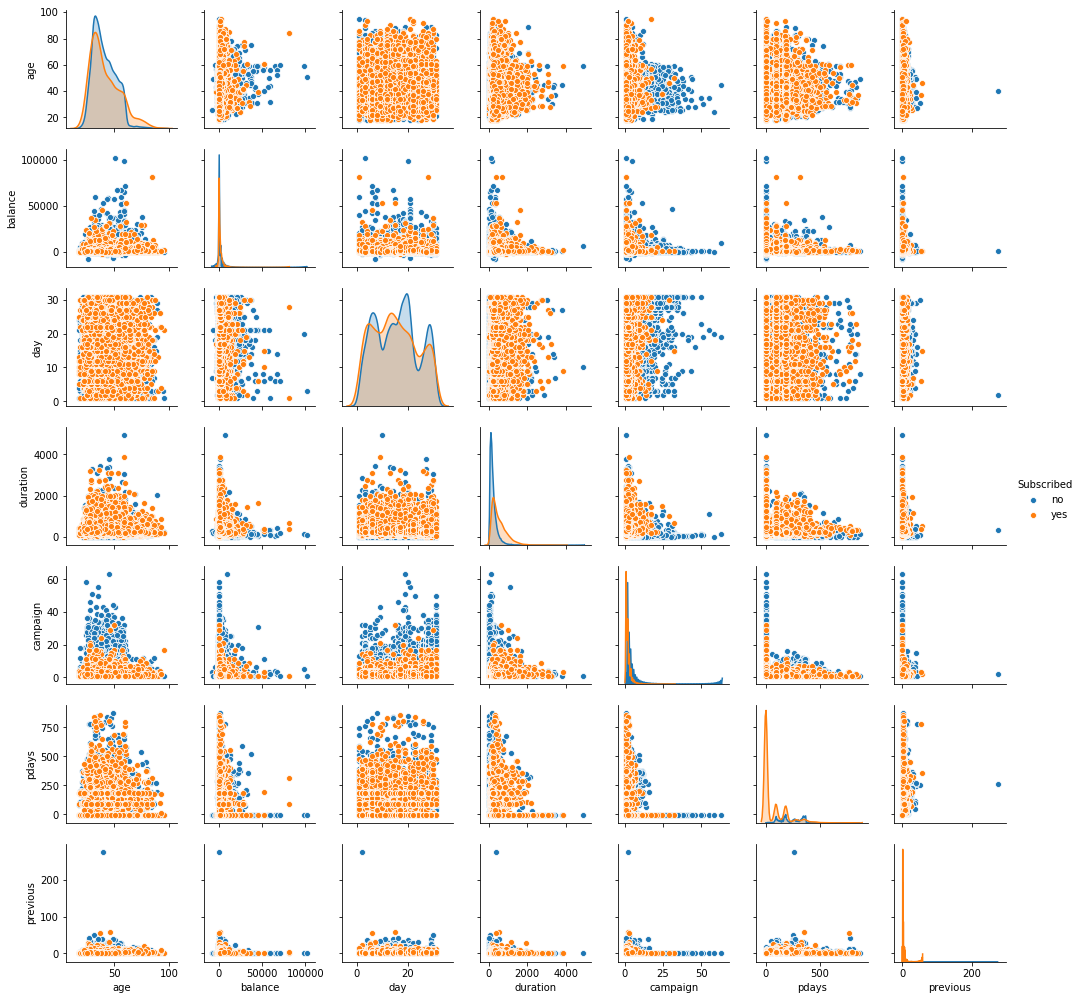

In [23]:
sns.pairplot(data = bankPromo, hue = "Subscribed", height = 2)

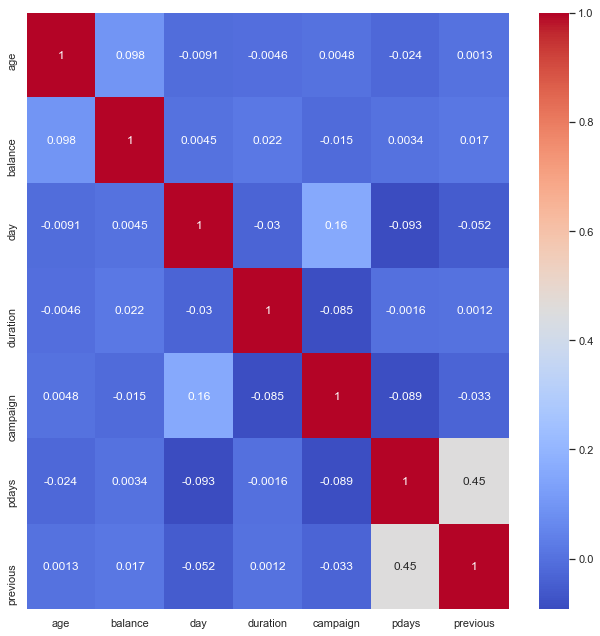

In [24]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(bankPromo.corr(), cmap="coolwarm", annot=True)
f.tight_layout()

As seen from above heatmap of correlation among numerical variables, none of pair of numerical varibales have significant,non-weak linear correlation among them except for correlation between (pdays and previous)(value 0.45). Next we would explore this correlation.

Since there are outliers present in the variable "previous",these may interfere with the relationship visualization of these two variables. So, we will plot these variables by only including values under 50 .

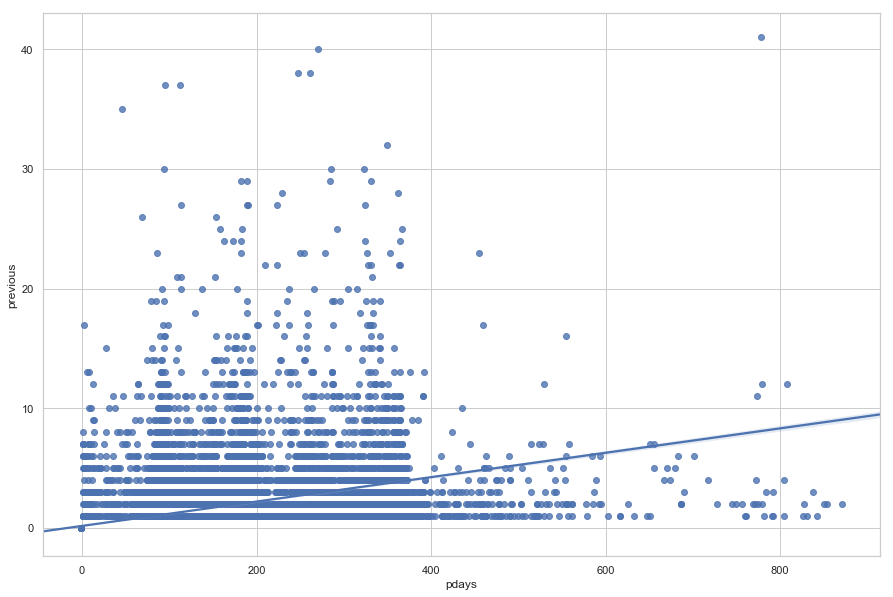

In [25]:
figure9, ax = plt.subplots(figsize=(15, 10))
sns.regplot(data=bankPromo.drop(index = bankPromo[bankPromo['previous'] > 50].index, axis = 0), 
            x="pdays",y="previous")

If we observe the plot above, we can see that correlation between these variables is relatively strong where  pdays are less 400 and moderately weak for pdays more than 400.

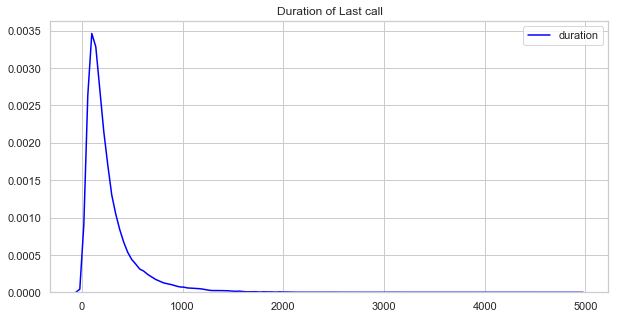

In [26]:
#duration of last call with the people contacted for this promotion

figure10 = plt.figure(figsize=(10,5))

callDuration1 = sns.kdeplot(bankPromo['duration'],  color="blue" )

callDuration1.set_title("Duration of Last call")

plt.show()

Majority of calls have a duration of less than 1000 seconds 15-16 mins approx'duration of last call',they make  histogram to be rightly skewed. But some of the observations also have duration of 4K-5k seconds, these longer calls dipicts the people that were interested in the offer.

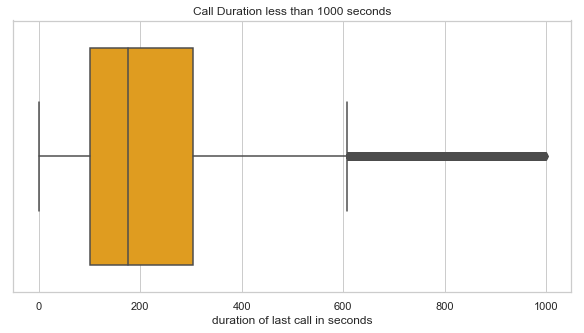

In [27]:
#for a closer look at call duration<1000
                                             
figure11 = plt.figure(figsize=(10,5))
ax = plt.subplot()
bankPromoSelDuration = bankPromo[bankPromo['duration'] < 1000 ]
callDuration2 = sns.boxplot(bankPromoSelDuration['duration'], ax = ax, color = "orange")


callDuration2.set_xlabel("duration of last call in seconds")
callDuration2.set_title("Call Duration less than 1000 seconds",) 
plt.show()

 When a  boxplot is created using these variables where duration is less than 1000, We see that almost 50% of the calls did not last 200 seconds and 75% calls lasted around 300 secs.

__Duration of Last Call compared to Target response__

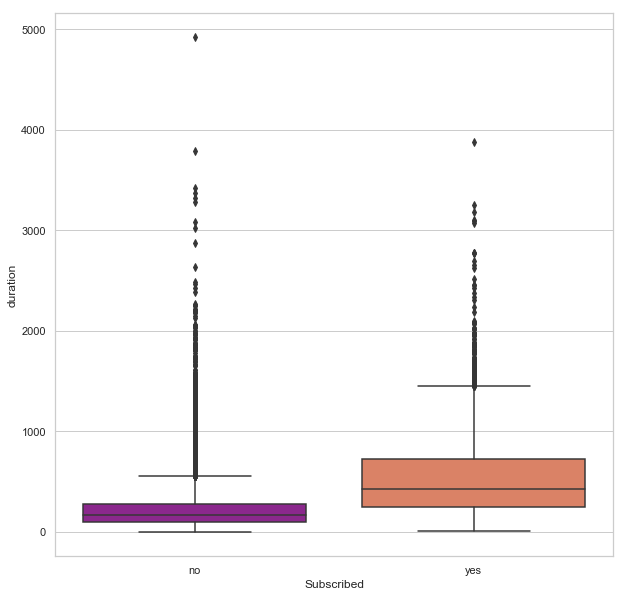

In [28]:
sns.set(style="whitegrid")
fig12, ax_durationVar = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
sns.boxplot(data = bankPromo, x = "Subscribed" , y ="duration", ax = ax_durationVar, palette="plasma")

The  plot above shows,"duration" variable distribution in relation to variable "Subscribed".
The distribution of duration across both levels is right skewed, and long tailed, most of the data is more concentrated in level "No"  as compared to level "Yes". 

level "No" has a lower median for duration variable in  as compared to "Yes" level dipicts that people who tend to have longer calls subscribe to the promotion. This is very obvious since, people need more information and have to provide more information if they are interested in the product or service, this exachnge of info takes time leading to longer call duration.


On the basis of this observation, "duration" could be a good predictor variable in predicting whether people will subscribe to the offering or not.

__Age of customer compared to job__

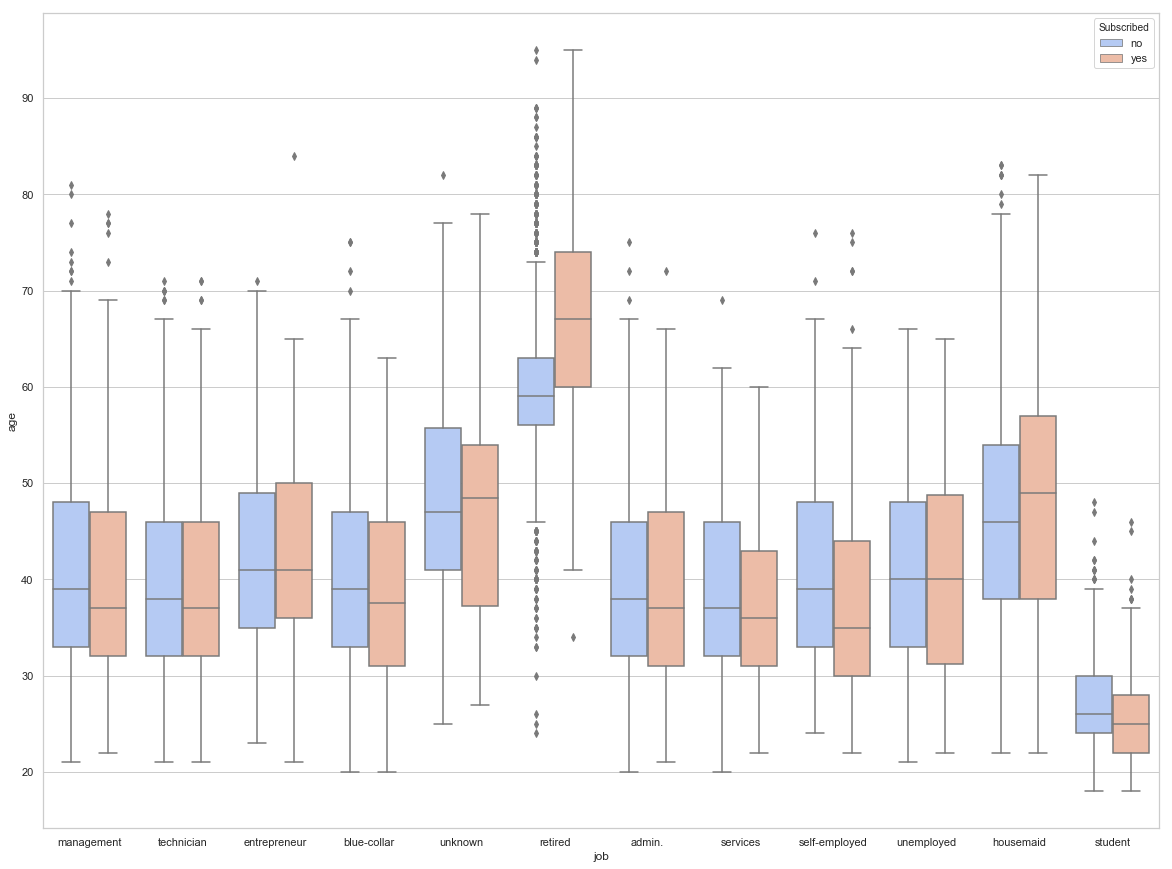

In [29]:
sns.set(style="whitegrid")
fig13, ax_ageVar = plt.subplots(figsize = (20,15))

sns.boxplot(data = bankPromo, x = "job", y = "age", hue="Subscribed", \
               palette="coolwarm")

From the above plot, created with age,job & Subscribed variables, we observe that there is a higher probability of accepting the offer by retired people who are around 70 years of age rather than retired people who are around 60 years.

People who are self employed + less than 40 years of age are expected to respond positively to the promotion than people who are self employed but more than 40 years of age.

Probability is high of Elderly housemaids to accept the offer rather than relatively young housemaids.


In [30]:
# To simplify the the visualization, we create a copy of original dataset
#and covert Subscribed column to binary 0 or 1

visualDf = bankPromo.copy()
visualDf['Subscribed_int'] = visualDf['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
visualDf['Subscribed_int'] = visualDf['Subscribed_int'].astype(np.int)

__How job,Education are related with target variable 'Subscribed'__

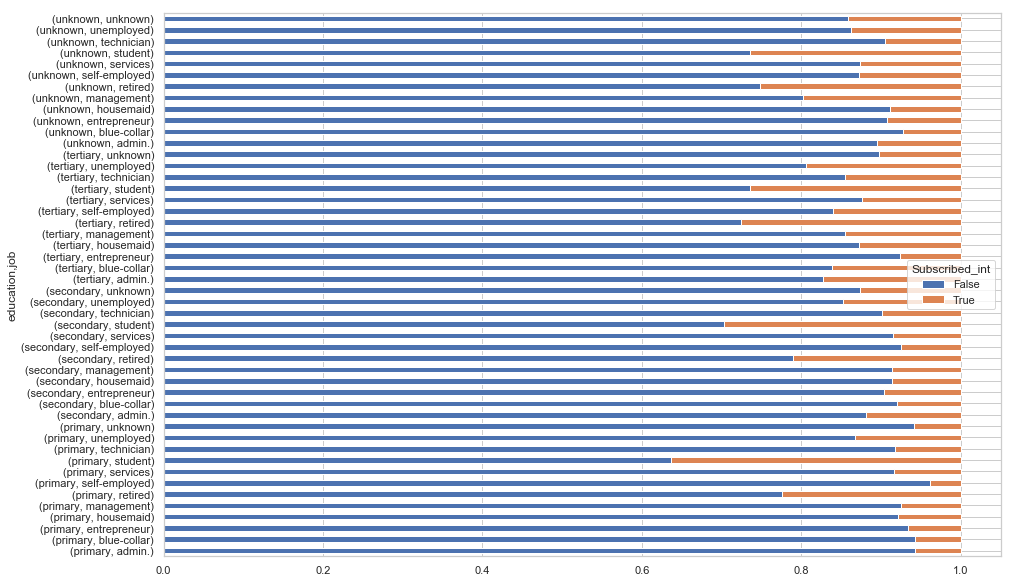

In [31]:
fig14, axes_educationjobVar = plt.subplots(figsize=(15,10))

Subscribed_Table = pd.crosstab([ visualDf['education'],visualDf['job'] ],

visualDf.Subscribed_int.astype(bool))

Subscribed_Proportion = Subscribed_Table.div(Subscribed_Table.sum(1).astype(float), axis=0)

Subscribed_Proportion.plot(kind='barh',

stacked=True, ax = axes_educationjobVar)

Probability of self employed people with primary education is least likely to subscribe, compared to other job education categories

Probability of students with primary, secondary or tertiary education to accept the offer is higher than other job, education categories

After students, possibility of retired people with tertiary education subscribing is higher compared to other people who are not students.


__Target Variable 'Subscribed' as compared to customers in previous marketing compaigns__

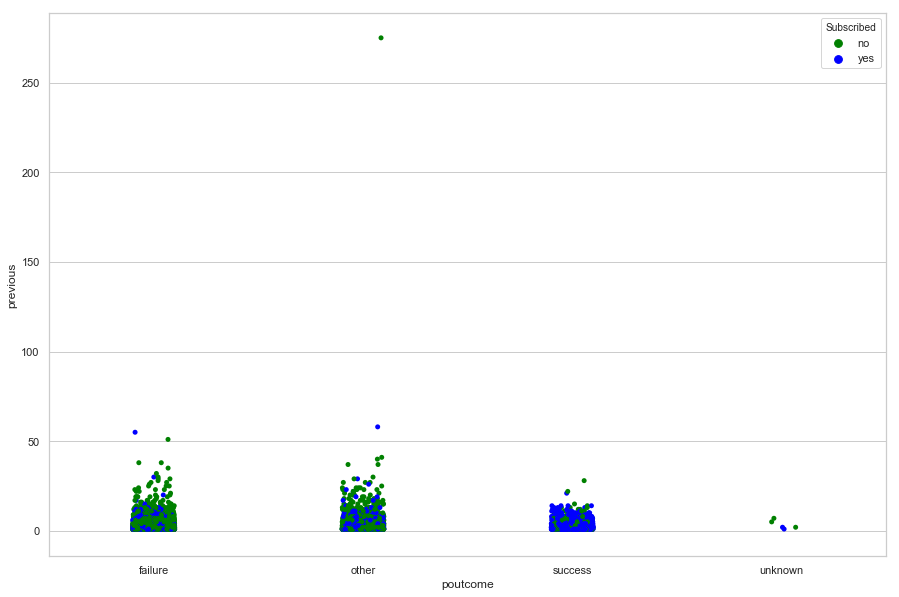

In [32]:
pall = dict(yes="blue",no="green")
fig15 = plt.figure(figsize=(15,10))

# Customers not contacted are identified by previous=0
bankPromoSelPrev = bankPromo[bankPromo['previous'] > 0 ]
sns.stripplot(x="poutcome", y="previous" , hue="Subscribed", data=bankPromoSelPrev,jitter=True,palette = pall)
plt.show()

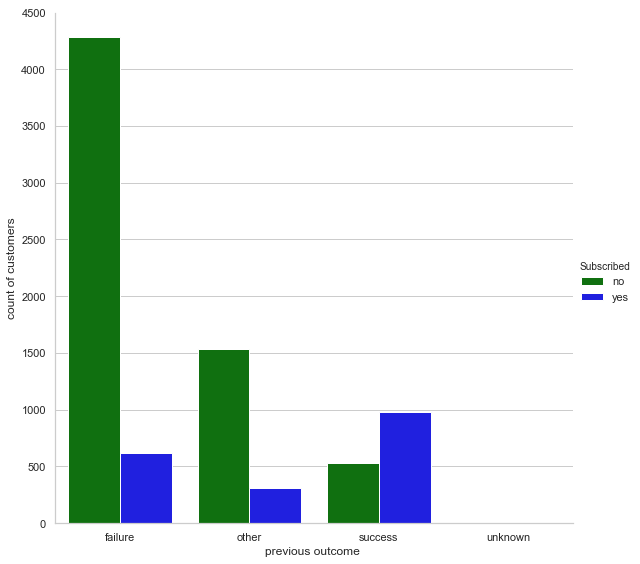

In [33]:
# A close look, excluding outlier data
bankPromoSelPrevI = bankPromoSelPrev[bankPromoSelPrev['previous'] < 200]
prevCust = sns.catplot(x="poutcome" , hue="Subscribed", data=bankPromoSelPrevI,palette=pall, kind="count",height=8)

prevCust.set_xlabels("previous outcome ")
prevCust.set_ylabels("count of customers")
prevCust.set_titles("Old customers")

By observing the plots above we see that there are very few unknowns outcomes from the previous campaign. 
Out of all old customers almost 2/3 of  with previous success result, subscribed again, this  means during this campaign, we lost 1/3 customers out of this group. 

Approximatly 1/10 of the people from previously not subscribed cluster,approximating to 500 customers who previously rejected in campaign, subscribed this time. 

Out of undecided group of previous campaing accepted offer in current campaign but most of them  decided to not accept.

So, contacting people from previous campaign does not seem to be a advantageous proposition.


__Next we would use classification models such as Logistic regression, SVM etc that use all the variables in our dataset to classify the target variable to "Yes" or "No"__

__One Hot Encoding: Categorical Variables__

In [34]:
# Make a copy of original data frame
bankPromModel = bankPromo.copy()
bankPromModel['Target'] = bankPromModel['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromModel['Target'] = bankPromModel['Target'].astype(np.int)
# Delete the original 'Subscribed' column
del bankPromModel['Subscribed']


In [35]:
# Covert all categorical variables to corresponding indicator variables
for categoryVar in categoryVars:
    tmpDf = pd.DataFrame()
    # To avoid multicollinearity we removed 1st class level 
    tmpDf = pd.get_dummies(bankPromModel[categoryVar], prefix=categoryVar, drop_first=True)
    bankPromModel = pd.concat((bankPromModel, tmpDf), axis=1)

# since indicator variables are created,now we can remove the original categorical variables.
bankPromModel.drop(categoryVars, inplace=True, axis=1)
bankPromModel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Target                 45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_sin

________________________________________________________________________________________________________
________________________________________________________________________________________________________
<a id="Perform8020split"></a>
<a href="#top">Back to Top</a>
### Perform 5 fold Cross Validation with 80/20 Split for Model Selection 

In [36]:
# Training and Test Split
from sklearn.model_selection import ShuffleSplit

if 'Target' in bankPromModel:
    y = bankPromModel['Target'].values 
    del bankPromModel['Target']        
    X = bankPromModel.values              
    
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
numCvarIterations = 5
numInstances = len(y)
cVarObject = ShuffleSplit(n_splits=numCvarIterations,
                         test_size  = 0.2, random_state=999)
                         
print(cVarObject)


ShuffleSplit(n_splits=5, random_state=999, test_size=0.2, train_size=None)


________________________________________________________________________________________________________
<a id="CreateLRModel"></a>
<a href="#top">Back to Top</a>
# Create Model
### Simple Logistic Model Fit

In [35]:

# Initialize an Empty Dataframe to store Model performance Stats
modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])

# Standardize the features first, since standardizing the features could lead to
# gradient desent algorithm to converge faster and then run logistic regression model

logisticModel = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=1.0, class_weight=None, random_state=999))

for iter_num, (train_indices, test_indices) in enumerate(cVarObject.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
       
    # train the reusable logisitc regression model on the training data
    logisticModel.fit(X_train,y_train)  # train object
    y_hat = logisticModel.predict(X_test) # get test set precitions

    # now let's get the accuracy,precision,recall,auc,F1 and confusion matrix for this iterations of training/testing
    tmpDict = dict()
    tmpDict['Accuracy'] = mt.accuracy_score(y_test,y_hat)
    tmpDict['AuC'] = mt.roc_auc_score(y_test,y_hat)
    tmpDict['F1 Score'] = mt.f1_score(y_test,y_hat)
    tmpDict['Precision'] = mt.precision_score(y_test,y_hat)
    tmpDict['Recall'] = mt.recall_score(y_test,y_hat)
    
    modelPerformanceMetrices = modelPerformanceMetrices.append(tmpDict, ignore_index=True)

    conf = mt.confusion_matrix(y_test,y_hat)
  
    print("=====Iteration",iter_num," =====")
    print("confusion matrix\n",conf)

display(modelPerformanceMetrices)
print("Average Model Performnace Metrices ")
display(modelPerformanceMetrices.mean())


=====Iteration 0  =====
confusion matrix
 [[7769  207]
 [ 706  361]]
=====Iteration 1  =====
confusion matrix
 [[7833  184]
 [ 680  346]]
=====Iteration 2  =====
confusion matrix
 [[7736  201]
 [ 703  403]]
=====Iteration 3  =====
confusion matrix
 [[7772  207]
 [ 696  368]]
=====Iteration 4  =====
confusion matrix
 [[7772  232]
 [ 645  394]]


,Accuracy,AuC,F1 Score,Precision,Recall
0,0.899038,0.656189,0.441590,0.635563,0.338332
1,0.904456,0.657140,0.444730,0.652830,0.337232
2,0.900033,0.669526,0.471345,0.667219,0.364376
3,0.900144,0.659961,0.449054,0.640000,0.345865
4,0.903019,0.675113,0.473273,0.629393,0.379211


Average Model Performnace Metrices 


Accuracy     0.901338
AuC          0.663586
F1 Score     0.455999
Precision    0.645001
Recall       0.353003
dtype: float64



This model's accuracy is high but due to class imbalance in the data set : No 89%, Yes 11%,we will have to adjust parameters to improve the classification metrices such as overall AuC score & F1 score which are currently 0.66 and 0.46 respectively.These results indicate that our model is not performing well.



**Grid Search : To tune model hyper parameters**

In [21]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

# Initialize an Empty Dataframe to store Model performance Stats
modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])

param_grid = {
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 50),
    'logisticregression__solver' : ['liblinear'],
    'logisticregression__class_weight' : [None, 'balanced']}


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Create grid search object

clf = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression(random_state=999)), \
                   param_grid = param_grid, cv = 5, verbose=False, n_jobs=-1, scoring=scoring, refit='AUC', \
                   return_train_score=True)

# Fit on data

for iter_num, (train_indices, test_indices) in enumerate(cVarobject.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
       
    # train the reusable logisitc regression model on the training data
    clf.fit(X_train,y_train)  # train object
    y_hat = clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    tmpDict = dict()
    tmpDict['Accuracy'] = mt.accuracy_score(y_test,y_hat)
    tmpDict['AuC'] = mt.roc_auc_score(y_test,y_hat)
    tmpDict['F1 Score'] = mt.f1_score(y_test,y_hat)
    tmpDict['Precision'] = mt.precision_score(y_test,y_hat)
    tmpDict['Recall'] = mt.recall_score(y_test,y_hat)
    
    modelPerformanceMetrices = modelPerformanceMetrices.append(tmpDict, ignore_index=True)

    conf = mt.confusion_matrix(y_test,y_hat)
  
    print("====Iteration",iter_num," ====")
    print("confusion matrix\n",conf)
    print("Best Estimator Model Parameters\n", clf.best_params_)

display(modelPerformanceMetrices)
print("Average Model Performance Metrices ")
display(modelPerformanceMetrices.mean())

====Iteration 0  ====
confusion matrix
 [[6699 1277]
 [ 188  879]]
Best Estimator Model Parameters
 {'logisticregression__C': 0.004291934260128779, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
====Iteration 1  ====
confusion matrix
 [[6829 1188]
 [ 206  820]]
Best Estimator Model Parameters
 {'logisticregression__C': 0.009102981779915217, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
====Iteration 2  ====
confusion matrix
 [[6717 1220]
 [ 186  920]]
Best Estimator Model Parameters
 {'logisticregression__C': 0.009102981779915217, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
====Iteration 3  ====
confusion matrix
 [[6730 1249]
 [ 187  877]]
Best Estimator Model Parameters
 {'logisticregression__C': 0.004291934260128779, 'logisticregression__cla

,Accuracy,AuC,F1 Score,Precision,Recall
0,0.837996,0.831850,0.545455,0.407699,0.823805
1,0.845848,0.825518,0.540541,0.408367,0.799220
2,0.844521,0.839058,0.566852,0.429907,0.831826
3,0.841203,0.833856,0.549843,0.412512,0.824248
4,0.838991,0.835343,0.542426,0.402706,0.830606


Average Model Performnace Metrices 


Accuracy     0.841712
AuC          0.833125
F1 Score     0.549023
Precision    0.412238
Recall       0.821941
dtype: float64

- **The result metrics of this model indicates that this model is performing better than our previous model.The overall average area under the curve (AuC) improved from 0.66 to 0.83.
- **F1 score improved from 0.45 to 0.55. 
- **Recall improved from 0.35 to 0.82. 
- **But, As compared to previous model, overall accuracy has slightly decreased from 0.90 to 0.84 and 
- **precision gone down by about 0.20. 


- **Since, AuC and F1 improved,balance between pricision and recall could be gained,by changing Prior probabilities.  

- **higher value of false positive rate indicates that bank would have to reach some additional customers who would not acccept the offer but higher recall rate,ensures that using this model,bank is less likely to miss customers who would accept the term deposit offer.**


__Logistics Regression Model with best parameters:__                                                                  
 'logisticregression__C': 0.009102981779915217,                                           
 'logisticregression__class_weight': 'balanced',                                                           
 'logisticregression__penalty': 'l1',                                                                     
 'logisticregression__solver': 'liblinear'.                                                              
 

In [40]:
# Initialize an Empty Dataframe to store Model performance indicators
modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])



logisticModel = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=0.009102981779915217,\
                                                                   class_weight='balanced', random_state=999, \
                                                                   solver='liblinear'))

for iter_num, (train_indices, test_indices) in enumerate(cVarObject.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
       
 # train the reusable logisitc regression model on the training data
    logisticModel.fit(X_train,y_train)  # train object
    y_hat = logisticModel.predict(X_test) # get test set precitions


#logisticModel.fit(X,y) 
#y_hat = logisticModel.predict(X_Final) # get test set precitions

# now let's get the accuracy,precision,recall,auc,F1 and confusion matrix for this iterations of training/testing
tmpDict = dict()
tmpDict['Accuracy'] = mt.accuracy_score(y_test,y_hat)
tmpDict['AuC'] = mt.roc_auc_score(y_test,y_hat)
tmpDict['F1 Score'] = mt.f1_score(y_test,y_hat)
tmpDict['Precision'] = mt.precision_score(y_test,y_hat)
tmpDict['Recall'] = mt.recall_score(y_test,y_hat)
    
modelPerformanceMetrices = modelPerformanceMetrices.append(tmpDict, ignore_index=True)

conf = mt.confusion_matrix(y_test,y_hat)
  
print("confusion matrix\n",conf)
    
print("\n Model Performnace Metrices")
display(modelPerformanceMetrices)



confusion matrix
 [[6753 1251]
 [ 189  850]]

 Model Performnace Metrices


,Accuracy,AuC,F1 Score,Precision,Recall
0,0.840761,0.830899,0.541401,0.404569,0.818094


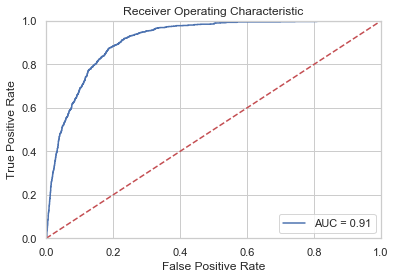

In [39]:
# Plot RoC Curve
from sklearn.metrics import roc_curve, auc
# calculate the true positive and false positive rate for all thresholds of classification
probs = logisticModel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Ref-: How to plot ROC curve in Python: Stackoverflow.com


# Feature Importance

In [52]:
classifierModel = logisticModel.named_steps['logisticregression']

comboVars = zip(classifierModel.coef_.T, bankPromModel.columns) # combine attributes
comboVars = sorted(comboVars)
for coef, name in comboVars:
    print(name, coef[0])

contact_unknown -0.6353942241003687
housing_yes -0.36470110483279844
month_jul -0.3153490711795842
month_may -0.2612070085293072
month_aug -0.2343094973015596
campaign -0.22527383291423733
month_nov -0.20314440154390484
loan_yes -0.16329431404387423
month_jan -0.16156725140170522
job_blue-collar -0.09984343522094447
marital_married -0.0684610135647357
poutcome_unknown -0.06742122161680067
job_housemaid -0.025882642953297213
job_self-employed -0.024316486953750577
job_entrepreneur -0.023371985301092676
job_services -0.021430402117944832
default_yes -0.0020973606891981442
age 0.0
contact_telephone 0.0
job_management 0.0
job_technician 0.0
job_unemployed 0.0
job_unknown 0.0
month_feb 0.0
pdays 0.0
day 0.001629677057047538
education_unknown 0.01185089509349705
education_secondary 0.015051461718808015
poutcome_other 0.019924755268315903
month_jun 0.04481005990043454
month_dec 0.04725959862124253
marital_single 0.04862978048625897
balance 0.050638471089112604
previous 0.06654740221015121
job

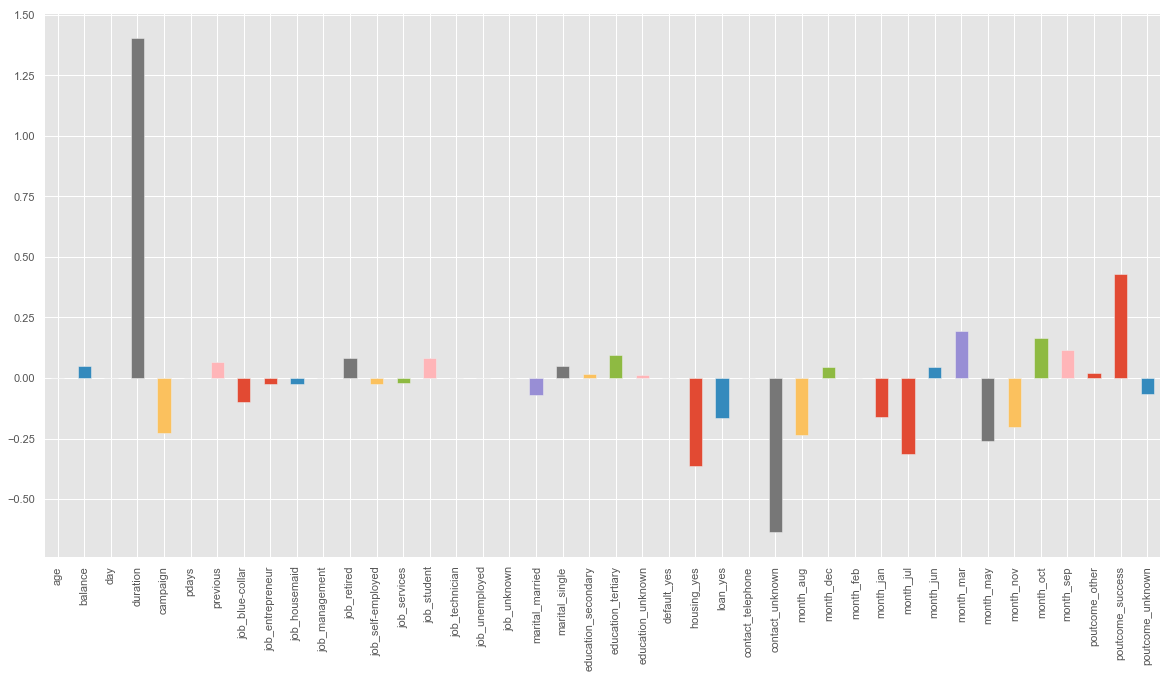

In [49]:
# feature importance visualization with ggplot
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
weights = pd.Series(classifierModel.coef_[0],index=bankPromModel.columns)
weights.plot(kind='bar')
plt.show()

__Positively correlated variables__: Affect the target varibale positively, higher the value, there is more    
                                     probability that customer will accept the offer.                                


- __Duration of call__: this attribute has highest positive importance score. So for this analysis Duration of call is most important variable in predicting which customers will accept the offer. 

- __poutcome_success__ This attribute hassecond highest positive coefficient. So this feature is also an important one to predict the positive response of customers.


__Negatively Correlated variable__:Affects the target varibale negatively, higher the value, lower the    
                                     probability that customer will accept the offer.                                



- __Contact_unknown__ This has highest negative coefficient ,so this feature is also important in predicting the negative response,ie, people who would not subscribe. 

- __poutcome_success__ This attribute hassecond highest positive coefficient. So this feature is also an important one to predict the positive response of customers.

- __housing_yes__ (customers who have a housing loan) : This variable has negative coefficient,means people who have housing loan are less likely to accept the offer 

- __month of July__ This has the negative coefficient and is another important feature in predicting the response variable. 
- __campaign__ (number of times customer is contacted during the current campaign):This shows a negative correlation, means that the more number of calls has higher probability of customer not accepting the offer


__Other Less Significant features__

- __Age__: As per the feature coefficient Age is not an important feature, but if used with other variables such as education and job it may turn out to be valuable.
- __Job related features__: these features combined have equal likelihood of acceptance and rejection to the offer. People with corporate jobs,students and retired people show a bit higher positive inclination towards the offer than people who are entreprebures, blue collar job  , people who have lower income jobs like housemaids and services.

- __Education__: This does not seem to an important feature on its own. When combined with other features like income,loans job may obscure this. 


________________________________________________________________________________________________________
<a id="SVMModel"></a>
<a href="#top">Back to Top</a>
### SVM Model

In [54]:
from sklearn.svm import SVC
# Initialize an Empty Dataframe to store Model performance Stats
modelPerformanceMetric = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])

# Standardize the features

svmClassifier = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='rbf', degree=3 , gamma=0.01, class_weight = 'balanced', random_state=999))

for iter_num, (train_indices, test_indices) in enumerate(cVarObject.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    
    
    # train the model
    svmClassifier.fit(X_train, y_train)  
    # To get test set preditions
    y_hat = svmClassifier.predict(X_test) 

    # now let's get the accuracy,precision,recall,auc,F1 and confusion matrix for this iterations of training/testing
    tmpDict = dict()
    tmpDict['Accuracy'] = mt.accuracy_score(y_test,y_hat)
    tmpDict['AuC'] = mt.roc_auc_score(y_test,y_hat)
    tmpDict['F1 Score'] = mt.f1_score(y_test,y_hat)
    tmpDict['Precision'] = mt.precision_score(y_test,y_hat)
    tmpDict['Recall'] = mt.recall_score(y_test,y_hat)
    
    modelPerformanceMetric = modelPerformanceMetrices.append(tmpDict, ignore_index=True)

    conf = mt.confusion_matrix(y_test,y_hat)
    #svm_Classifier = svmClassifier.named_steps['svc']
    print("====Iteration",iter_num," ====")
    print("confusion matrix\n",conf)
    #print("Best Estimator Model Parameters\n", svm_model.best_params_)

display(modelPerformanceMetric)


print("Average Model Performnace Metrices ")
display(modelPerformanceMetric.mean())

====Iteration 0  ====
confusion matrix
 [[6659 1317]
 [ 137  930]]
====Iteration 1  ====
confusion matrix
 [[6737 1280]
 [ 146  880]]
====Iteration 2  ====
confusion matrix
 [[6625 1312]
 [ 125  981]]
====Iteration 3  ====
confusion matrix
 [[6664 1315]
 [ 141  923]]
====Iteration 4  ====
confusion matrix
 [[6655 1349]
 [ 121  918]]


,Accuracy,AuC,F1 Score,Precision,Recall
0,0.840761,0.830899,0.541401,0.404569,0.818094
1,0.837443,0.857501,0.555354,0.404940,0.883542


Average Model Performnace Metrices 


Accuracy     0.839102
AuC          0.844200
F1 Score     0.548378
Precision    0.404755
Recall       0.850818
dtype: float64

- **As we can see from above performance metrics this model has performed better as compared to previous model in terms of :

  **overall average AuC has improved from 0.65 to 0.84.
  **F1 score improved from 0.44 to 0.56. 
  **Recall has improved significantly from 0.35 to 0.87. 
  **overall accuracy decreased slightly from 0.90 to 0.84  
  **precision drop by about 0.20. 
  
  **But since, overall AuC and F1 improved,  changing Prior probabilities, a balance between pricision and recall could be achieved. 


In [82]:
customerClassifier = DecisionTreeClassifier(max_leaf_nodes = 12)
customerClassifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=12,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
# Initialize an Empty Dataframe to store Model performance Stats
modelPerformanceMetric = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])

# Standardize the features

customerClassifier = DecisionTreeClassifier(class_weight="balanced")

for iter_num, (train_indices, test_indices) in enumerate(cVarObject.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    
    
    # train the model
    customerClassifier.fit(X_train, y_train)  
    # To get test set preditions
    y_hat = customerClassifier.predict(X_test) 

    # now let's get the accuracy,precision,recall,auc,F1 and confusion matrix for this iterations of training/testing
    tmpDict = dict()
    tmpDict['Accuracy'] = mt.accuracy_score(y_test,y_hat)
    tmpDict['AuC'] = mt.roc_auc_score(y_test,y_hat)
    tmpDict['F1 Score'] = mt.f1_score(y_test,y_hat)
    tmpDict['Precision'] = mt.precision_score(y_test,y_hat)
    tmpDict['Recall'] = mt.recall_score(y_test,y_hat)
    
    modelPerformanceMetric = modelPerformanceMetric.append(tmpDict, ignore_index=True)

    conf = mt.confusion_matrix(y_test,y_hat)
    #svm_Classifier = svmClassifier.named_steps['svc']
    print("====Iteration",iter_num," ====")
    print("confusion matrix\n",conf)
    #print("Best Estimator Model Parameters\n", svm_model.best_params_)

display(modelPerformanceMetric)


print("Average Model Performnace Metrices ")
display(modelPerformanceMetric.mean())

====Iteration 0  ====
confusion matrix
 [[7423  553]
 [ 606  461]]
====Iteration 1  ====
confusion matrix
 [[7504  513]
 [ 558  468]]
====Iteration 2  ====
confusion matrix
 [[7427  510]
 [ 634  472]]
====Iteration 3  ====
confusion matrix
 [[7397  582]
 [ 599  465]]
====Iteration 4  ====
confusion matrix
 [[7453  551]
 [ 556  483]]


,Accuracy,AuC,F1 Score,Precision,Recall
0,0.871835,0.681360,0.443056,0.454635,0.432052
1,0.881566,0.696076,0.466368,0.477064,0.456140
2,0.873493,0.681254,0.452107,0.480652,0.426763
3,0.869402,0.682044,0.440550,0.444126,0.437030
4,0.877585,0.698015,0.465991,0.467118,0.464870


Average Model Performnace Metrices 


Accuracy     0.874776
AuC          0.687750
F1 Score     0.453614
Precision    0.464719
Recall       0.443371
dtype: float64

In [85]:
customerPred = customerClassifier.predict(X_test)

In [86]:
dictTemp = dict()
dictTemp ['Accuracy'] = mt.accuracy_score(y_test,y_hat)
dictTemp ['AuC'] = mt.roc_auc_score(y_test,y_hat)
dictTemp ['F1 Score'] = mt.f1_score(y_test,y_hat)
dictTemp ['Precision'] = mt.precision_score(y_test,y_hat)
dictTemp ['Recall'] = mt.recall_score(y_test,y_hat)
    
modelPerformanceMetrices = modelPerformanceMetrices.append(dictTemp , ignore_index=True)
  
print("====Iteration",iter_num," ====")
  
display(modelPerformanceMetrices)
print("Average Model Performnace Metrices ")
display(modelPerformanceMetrices.mean())


====Iteration 4  ====


,Accuracy,AuC,F1 Score,Precision,Recall
0,0.840761,0.830899,0.541401,0.404569,0.818094
1,0.837443,0.857501,0.555354,0.404940,0.883542
2,0.837443,0.857501,0.555354,0.404940,0.883542
3,0.837443,0.857501,0.555354,0.404940,0.883542
4,0.837443,0.857501,0.555354,0.404940,0.883542
5,0.837443,0.857501,0.555354,0.404940,0.883542


Average Model Performnace Metrices 


Accuracy     0.837996
AuC          0.853067
F1 Score     0.553028
Precision    0.404879
Recall       0.872634
dtype: float64

In [87]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = customerPred)

array([[7574,  430],
       [ 538,  501]])

# Conclusion


The goal of this project was to maximize the __AuC score__ and not the __'Accuracy'__ of the model since our data set is imbalanced, having approximately 89% of target response as No, and only 11% as yes. To classify the customer response based on various attributes, we first did some preprocessing to understand the thouroughness and tendency of our data set distribution. We plotted various graphs and plot to check the individual distribution and relationship with other variables. Since our data was imbalanced, we decided to do a 5 fold cross validation with 80/20 split of the data, so we can get unbiased results.

We used three classification models:
1. __Logistics Regression__
2. __Support Vector Machine Classifier__
3. __Decision Tree Classifier__

While implementing logistics regression, we first tried to apply simple model with default parameters, where we acheived the average AuC score of '0.663586' and F1 Score of 0.455999, which seems to be low. To tune our simple model hyperparameters we decided to apply grid search. We applied Grid Search results to second logistics regression model and acheived AuC Score of 0.830899 with is an increase of almost 0.17 and F1 score of 0.541401 almost 0.10 point more than previous model. After performing logistics regression we performed feature importance interpretation, to see which attributes are most and least important and affecting the target variable

Next we used SVM for this classification problem, since we beleived that SVM can give us improved reults.After applying the SVM we could acheive the AuC score of 0.844200 and F1 Score of 0.548378 which is only slightly better than logistics regression model result. 

As our third model, we applied the most popular decision tree classifier. With decision tree we acheived AuC score of  0.853067 and F1 Score of 0.553028, which is slightly better than our previous models, but does not give us significantly improved results. 

To conclude, All three classification techniques provided almost same results , which seems reasonable and to get even better results we planned to create an ensemble model combining all three classifiers,this will be our work for our future study.



# References

1)__Data Set__:Source:UCI Machine Learning, https://archive.ics.uci.edu/ml/datasets/bank+marketing
            [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank              Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


2) __Stackoverflow__https://stackoverflow.com
3) __Stackoverflow__:https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python/31962355

4) __Towardsdatascience__:https://towardsdatascience.com/data-science/home

5) __"Using Data Mining for Bank Direct Marketing: An Application of the CRISP- DM Methodology" ::https://www.researchgate.net/publication/236231158_Using_Data_Mining_for_Bank_Direct_Marketing_An_Application_of_the_CRISP-DM_Methodology 


In addition to these resources we used code that we learned in class and through our assignments. 

